In [1]:
# Importing new libraries
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA # principal component analysis


# Importing known libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster import KMeans # k-means clustering


# Importing known libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



# Importing dataset
customers_df = pd.read_excel('finalExam_Mobile_App_Survey_Data.xlsx')

In [3]:
customers_df

caseID  q1  q2r1  q2r2  q2r3  q2r4  q2r5  q2r6  q2r7  q2r8  q2r9  q2r10  \
0        355   5     0     1     1     0     0     0     0     0     0      0   
1       1397   3     0     0     1     0     0     0     0     0     0      0   
2       1197   2     0     1     1     0     0     0     0     0     0      0   
3        484   2     0     0     0     0     1     0     0     0     0      0   
4       2113   4     0     0     0     1     0     0     0     0     0      0   
5        966   7     0     0     1     0     0     0     0     0     0      0   
6       1960   3     0     0     1     0     0     0     0     0     0      0   
7       2306   5     0     0     1     1     0     0     0     0     0      0   
8       2078   3     1     0     0     0     0     0     0     1     0      0   
9        714   6     0     0     1     0     0     0     0     1     0      0   
10      1627   4     1     0     0     0     0     0     0     0     0      0   
11      2274   6     1     0     0     0     0     0     0     0     0      0   
12      1180   2     1     0     0     0     0     0     0     0     0      0   
13       362   2     1     0     0     0     0     0     0     0     0      0   
14      1072   2     0     0     1     0     0     0     0     0     0      0   
15      1194   4     0     0     0     0     0     0     1     0     0      0   
16      1053   8     1     0     0     0     0     0     0     0     0      0   
17      1767   6     0     0     1     0     0     0     0     1     0      0   
18      1964   2     1     0     0     0     0     0     0     0     0      0   
19      2041   5     1     0     0     0     0     0     0     0     0      0   
20       939   6     0     0     1     0     0     0     0     0     0      0   
21      2163   9     0     1     1     0     0     0     0     1     0      0   
22        58   2     0     0     0     1     0     0     0     0     0      0   
23      1217   9     1     0     0     0     0     0     0     0     0      0   
24      1012   6     0     0     0     1     0     0     0     0     0      0   
25      2171   8     1     1     0     0     0     0     0     1     0      0   
26      2386   2     0     0     1     0     0     0     0     0     0      0   
27      1521   6     1     0     0     0     1     0     0     1     0      0   
28      2296   4     1     1     0     0     0     0     0     0     0      0   
29      2084   8     1     0     0     0     0     0     0     0     0      0   
30       677   5     0     0     1     1     0     0     0     0     0      0   
31       389   2     0     0     1     0     0     0     0     0     0      0   
32       777   4     0     1     0     1     0     0     0     0     0      0   
33      1124   3     1     0     0     0     0     0     0     0     0      0   
34      1174   5     0     0     0     0     0     0     0     0     1      0   
35       141   3     0     0     0     1     0     0     0     0     0      0   
36      1921   2     1     1     0     0     0     0     0     0     0      0   
37       776   8     1     0     0     0     0     0     0     0     0      0   
38      2295   5     1     0     0     0     0     0     0     0     0      0   
39       428   2     1     0     0     0     0     0     0     0     0      0   
40       824   9     0     0     1     0     0     0     0     0     0      0   
41       582   7     0     0     0     1     0     0     0     1     0      0   
42       554   2     1     1     1     1     0     0     1     1     0      0   
43      1477   4     0     0     1     0     0     0     0     0     0      0   
44       240   7     1     1     0     0     0     0     0     0     0      0   
45       380   2     0     0     1     0     0     0     0     0     0      0   
46       692   2     0     0     1     0     0     0     0     0     0      0   
47       489   5     0     0     1     1     0     0     0     0     0      0   
48      1619   4     0     0     1   

In [4]:
customer_features_reduced = customers_df.copy()

In [5]:
customer_features_reduced = customers_df.drop(["caseID", "q1","q2r1","q2r2", "q2r3","q2r4","q2r5","q2r6","q2r7","q2r8","q2r9","q2r10","q48","q49" ,"q50r1","q50r2","q50r3","q50r4", "q54", "q55","q56","q57"],1)

In [6]:
print(customer_features_reduced.corr())

            q4r1      q4r2      q4r3      q4r4      q4r5      q4r6      q4r7  \
q4r1    1.000000  0.134097  0.198881  0.127052  0.146866  0.227647  0.140945   
q4r2    0.134097  1.000000  0.276606  0.422405  0.107553  0.056712  0.190173   
q4r3    0.198881  0.276606  1.000000  0.337396  0.244720  0.127733  0.229953   
q4r4    0.127052  0.422405  0.337396  1.000000  0.137958  0.067970  0.222649   
q4r5    0.146866  0.107553  0.244720  0.137958  1.000000  0.240859  0.140850   
q4r6    0.227647  0.056712  0.127733  0.067970  0.240859  1.000000  0.193282   
q4r7    0.140945  0.190173  0.229953  0.222649  0.140850  0.193282  1.000000   
q4r8    0.206991  0.258304  0.258670  0.242236  0.135078  0.148883  0.260956   
q4r9    0.200301  0.269728  0.227811  0.244885  0.086823  0.156408  0.347064   
q4r10   0.039181  0.002801 -0.067257 -0.025537 -0.079147 -0.012341 -0.002212   
q4r11  -0.200663 -0.064730 -0.123780 -0.080124 -0.239953 -0.277573 -0.141928   
q11     0.309489  0.129508  0.206454  0.

In [7]:
customer_features_reduced

q4r1  q4r2  q4r3  q4r4  q4r5  q4r6  q4r7  q4r8  q4r9  q4r10  q4r11  q11  \
0        0     0     1     0     1     0     1     0     0      0      0    3   
1        1     0     0     0     0     1     0     0     0      0      0    2   
2        0     0     0     0     1     1     1     0     0      0      0    1   
3        1     0     0     1     1     1     0     0     0      0      0    3   
4        1     0     0     0     0     1     0     0     0      0      0    1   
5        1     0     0     1     0     1     0     0     0      0      0    5   
6        1     0     0     0     1     1     1     0     0      0      0    4   
7        1     0     0     0     1     1     0     1     0      0      0    3   
8        1     1     0     0     1     1     0     0     0      0      0    4   
9        0     0     1     0     1     1     1     1     0      0      0    3   
10       1     0     1     1     1     1     1     1     0      0      0    4   
11       1     1     1     1     1     1     1     1     0      0      0    4   
12       0     0     0     0     1     1     0     1     0      0      0    3   
13       0     0     0     0     1     1     1     0     0      0      0    1   
14       1     0     0     0     0     0     0     0     0      0      0    1   
15       0     0     0     0     1     0     0     0     0      0      0    1   
16       0     0     0     0     1     1     0     1     0      0      0    3   
17       1     0     0     0     1     1     0     1     0      0      0    3   
18       1     1     0     0     1     1     0     0     0      0      0    4   
19       1     0     1     0     1     1     0     1     0      0      0    4   
20       0     0     1     0     1     1     1     0     0      0      0    2   
21       1     1     0     1     1     1     1     1     1      0      0    3   
22       0     0     0     0     0     1     0     0     0      0      0    1   
23       0     0     0     0     1     1     1     0     0      1      0    4   
24       0     0     0     0     0     1     0     0     0      0      0    1   
25       1     0     1     0     1     1     1     1     1      0      0    4   
26       1     1     1     0     0     0     0     0     0      0      0    2   
27       1     0     0     0     1     1     0     0     0      0      0    4   
28       1     1     1     1     1     1     1     1     1      0      0    4   
29       1     0     1     0     1     1     0     0     0      0      0    3   
30       0     0     0     0     1     1     1     1     0      0      0    3   
31       0     0     0     0     1     0     0     1     0      0      0    3   
32       1     0     1     1     1     1     1     0     1      0      0    4   
33       0     0     1     0     1     1     0     1     0      0      0    4   
34       0     0     0     0     1     1     0     1     0      0      0    3   
35       0     0     0     0     1     1     0     0     0      0      0    3   
36       1     0     0     0     1     0     0     1     0      0      0    3   
37       0     0     0     0     0     1     0     0     0      1      0    3   
38       1     0     1     1     1     1     1     1     1      0      0    4   
39       0     1     1     1     1     1     1     1     1      1      0    2   
40       0     0     0     0     0     0     0     0     0      0      1    1   
41       1     1     0     0     0     1     1     1     1      0      0    2   
42       0     1     1     1     1     1     1     1     1      0      0    4   
43       1     0     0     0     1     1     0     1     0      0      0    3   
44       0     0     0     1     0     0     1     1     1      0      0    3   
45       0     0     0     0     1     1     0     0     0      0      0    5   
46       0     0     0     0     1     1     1     0     0      0      0    3   
47       0     0     1     0     1     1     1     1     1      0      0    3   
48       1     0     0     0     1   

In [8]:
## Scale to get equal variance
scaler = StandardScaler()


scaler.fit(customer_features_reduced)


X_scaled_reduced = scaler.transform(customer_features_reduced)

In [9]:
## Run PCA without limiting the number of components
customer_pca_reduced = PCA(n_components = None,
                           random_state = 508)


customer_pca_reduced.fit(X_scaled_reduced)


X_pca_reduced = customer_pca_reduced.transform(X_scaled_reduced)

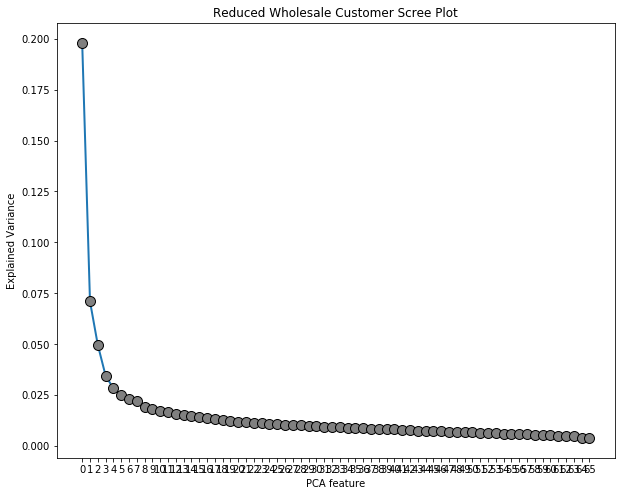

In [10]:
## Analyze the scree plot to determine how many components to retain
fig, ax = plt.subplots(figsize=(10, 8))

features = range(customer_pca_reduced.n_components_)


plt.plot(features,
         customer_pca_reduced.explained_variance_ratio_,
         linewidth = 2,
         marker = 'o',
         markersize = 10,
         markeredgecolor = 'black',
         markerfacecolor = 'grey')


plt.title('Reduced Wholesale Customer Scree Plot')
plt.xlabel('PCA feature')
plt.ylabel('Explained Variance')
plt.xticks(features)
plt.show()

In [11]:
## Run PCA again based on the desired number of components
customer_pca_reduced = PCA(n_components = 3,
                           random_state = 508)


customer_pca_reduced.fit(X_scaled_reduced)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=508,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
## Analyze factor loadings to understand principal components
factor_loadings_df = pd.DataFrame(pd.np.transpose(customer_pca_reduced.components_))


factor_loadings_df = factor_loadings_df.set_index(customer_features_reduced.columns)


print(factor_loadings_df)


factor_loadings_df.to_excel('practice_factor_loadings.xlsx')

               0         1         2
q4r1   -0.049086 -0.073805 -0.207817
q4r2   -0.103384  0.115745 -0.181673
q4r3   -0.094982  0.034417 -0.201579
q4r4   -0.104689  0.113268 -0.179556
q4r5   -0.061381 -0.055946 -0.148525
q4r6   -0.048991 -0.166100 -0.190819
q4r7   -0.071024 -0.033579 -0.188902
q4r8   -0.089871 -0.037675 -0.205018
q4r9   -0.067653 -0.012227 -0.235636
q4r10   0.017210 -0.031626 -0.010737
q4r11   0.048313  0.038468  0.159908
q11    -0.040576 -0.106009 -0.212372
q12     0.068126 -0.099766  0.040902
q13r1   0.080894  0.076199  0.101801
q13r2   0.123574 -0.111363  0.145135
q13r3   0.115625 -0.243702  0.052992
q13r4   0.091056 -0.042461  0.190444
q13r5   0.120795 -0.201581  0.124178
q13r6   0.100755 -0.025260  0.108648
q13r7   0.119893 -0.253943  0.084833
q13r8   0.122078 -0.217264  0.142947
q13r9   0.112087 -0.183822  0.050780
q13r10  0.090172 -0.057245  0.257195
q13r11  0.097603 -0.123575  0.178226
q13r12  0.092316 -0.065713  0.184336
q24r1   0.089668 -0.098239 -0.088712
q

In [13]:
## Analyze factor strengths per customer

X_pca_reduced = customer_pca_reduced.transform(X_scaled_reduced)


X_pca_df = pd.DataFrame(X_pca_reduced)

In [14]:
## Rename your principal components and reattach demographic information

X_pca_df.columns = ['level_1', 'level_2', 'level_3']


In [15]:
## segment q2 and q 50
customers_df['q2'] = customers_df['q2r1'] + customers_df['q2r2']+ customers_df['q2r3']+ customers_df['q2r4']+ customers_df['q2r5']+ customers_df['q2r6']+ customers_df['q2r7']+ customers_df['q2r8']+ customers_df['q2r9']+ customers_df['q2r10']

In [16]:
customers_df['q50'] = customers_df['q50r1'] + customers_df['q50r2']+ customers_df['q50r3']+ customers_df['q50r4']+ customers_df['q50r5']

In [17]:
final_pca_df = pd.concat([customers_df.loc[ : , [ 'q2','q48','q49','q50','q54','q55','q56', 'q57']] , X_pca_df], axis = 1)

In [18]:
final_pca_df

q2  q48  q49  q50  q54  q55  q56  q57    level_1   level_2   level_3
0      2    3    1    1    1    2   11    1   2.654888  1.056920  2.326278
1      1    3    2    1    2    2    9    2   2.013737 -1.181366  2.094691
2      2    1    2    1    1    2    8    2   1.709612 -2.292910  0.342019
3      1    4    2    1    2    2    1    1  -4.783793  1.694218  1.225203
4      1    3    1    1    1    2   11    2   1.321821  0.603216 -0.399473
5      1    3    4    1    1    2    2    1   5.880143  1.862645 -0.178899
6      1    4    2    1    1    2    6    2  -2.151745 -2.801946  0.284126
7      2    4    1    2    1    2    9    1   0.099673 -1.411676  1.920713
8      2    4    2    1    1    2    6    2   3.444521 -0.322817 -3.184820
9      2    2    2    1    1    2    5    2  -5.461043 -1.129728 -0.503344
10     1    3    2    3    1    2    5    1  -0.005108 -1.118052  0.346528
11     1    6    1    1    1    2   11    1  -0.922315 -0.073823 -1.848599
12     1    3    2    1    1    2    4    1  -3.623590 -1.211861  1.526687
13     1    3    2    1    6    2    1    1  -0.509172 -1.073684  3.585049
14     1    4    3    1    3    2    5    2   5.280270  3.489099  2.052238
15     1    2    3    2    2    2    5    1   1.089671  1.008873  3.608448
16     1    3    2    1    1    2    5    1   0.278351 -0.758935  1.972994
17     2    4    1    2    1    2   13    1   4.337634 -0.884158 -0.839084
18     1    3    2    1    1    2    4    2   2.650987  1.108207 -0.983457
19     1    2    2    1    2    2    1    2   2.112432 -0.260190 -3.038383
20     1    3    1    2    1    2    9    2   3.767162  1.149883  0.664108
21     3    5    1    1    1    2    5    2  -4.659602  1.758498 -1.861842
22     1    4    2    1    1    2    5    1   1.174398 -0.465342  2.664413
23     1    4    4    1    1    2    4    1   3.302175 -1.120392 -0.869775
24     1    2    1    1    1    2    6    1   5.904704 -0.491653  0.465697
25     3    6    1    1    1    2   14    2   1.596618 -0.325960 -2.908570
26     1    2    2    1    2    1    1    1  -1.751451  2.461628  2.846901
27     3    3    1    2    1    2   12    1  -0.388957 -2.532754 -0.408014
28     2    6    1    1    1    2   12    1  -2.594156 -0.847134 -1.669937
29     1    6    4    2    1    2   12    2   2.426408 -1.125264 -0.102300
30     2    2    1    1    1    2    5    1   2.508741  0.065218 -0.414736
31     1    3    2    1    1    1    4    2   4.503877  0.891711  0.657428
32     2    4    1    1    2    2   11    2  -3.880846  0.920580 -2.240069
33     1    6    1    1    1    2   11    1   1.844212  0.438885 -0.516559
34     1    2    3    3    1    2    4    1  -0.518886 -1.102762  1.363313
35     1    4    2    1    1    2    5    1   5.748122 -0.284833 -0.185533
36     2    4    2    1    1    2    1    1   1.911002  2.331986  0.096287
37     1    3    4    1    1    2    6    1   3.847939  1.569517  0.547733
38     1    4    1    2    1    2    8    1  -1.664592 -1.466757 -2.500458
39     1    4    2    1    1    2    9    2   0.175535  4.738776 -2.474434
40     1    3    1    1    1    2    9    1   7.232139  3.759176  4.179610
41     2    2    1    1    1    2   11    1  -0.752222  0.612169 -2.311391
42     6    6    2    1    1    2    9    1  -0.161681  4.969665 -5.198658
43     1    4    1    1    1    2    9    2   4.111594 -1.723053 -1.096200
44     2    6    4    1    1    2    9    1  -1.291632  0.961375  0.104074
45     1    3    2    1    2    2    7    1   3.504961 -2.231522 -0.224748
46     1    2    3    1    1    2    2    1   2.401039  0.634949  0.150971
47     2    4    1    1    1    2   12    2  -2.491132 -0.979481 -0.558913
48     1    4    1    1    1    2    8    2   0.912089 -3.447414 -1.665183
49     1    3    2    1    1    2   14    1   0.281143 -1.856185  0.573806
50     2    6    1    1    1    2   13    2   2.930354 -1.147261  0.695306
51     1    4    3    1    1    2    6    1  -0.887661  2.113722 -0.556780
52     1    4    2    1    3   

## Renaming

In [19]:
def q2_level(q2):
    if (q2 <= 2 and q2 >= 0):
        return 'lower_user'
    elif (q2 > 2 and q2 < 5):
        return 'middle_user'
    elif (q2 >= 5 and q2 < 10):
        return 'higher_user'
    
final_pca_df['q2'] = final_pca_df['q2'].apply(q2_level).astype(str)

In [20]:
def q_level(q48):
    if (q48 <= 2 and q48 >= 0):
        return 'low_education'
    elif (q48 > 2 and q48 < 5):
        return 'middle_education'
    elif (q48 >= 5 and q48 <= 6):
        return 'higher_education'
    
final_pca_df['q48'] = final_pca_df['q48'].apply(q_level).astype(str)

In [21]:
def q_level(q49):
    if (q49 == 1):
        return 'Married'
    elif (q49 == 2):
        return 'Single'
    elif (q49 == 3):
        return 'Single with a partner'
    elif (q49 == 4):
        return 'eparated/Widowed/Divorced'
    
final_pca_df['q49'] = final_pca_df['q49'].apply(q_level).astype(str)

In [22]:
def q_level(q50):
    if (q50 == 1):
        return 'No children'
    elif (q50 == 2):
        return 'Two children'
    elif (q50 == 3):
        return 'Three children'
    elif (q50 == 4):
        return 'More Than Three children'
    
final_pca_df['q50'] = final_pca_df['q50'].apply(q_level).astype(str)

In [23]:
def q_level(q54):
    if (q54 == 1):
        return 'White or Caucasian'
    elif (q54 == 2):
        return 'Black or African American'
    elif (q54 == 3):
        return 'Asian'
    elif (q54 == 4):
        return 'Native Hawaiian or Other Pacific Islander'
    elif (q54 == 5):
        return 'American Indian or Alaska Native'
    elif (q54 == 6):
        return 'Other race'    

final_pca_df['q54'] = final_pca_df['q54'].apply(q_level).astype(str)

In [24]:
def q_level(q55):
    if (q55 == 1):
        return 'Hispanic or Latino'
    elif (q55 == 2):
        return 'Not Hispanic or Latino'

final_pca_df['q55'] = final_pca_df['q55'].apply(q_level).astype(str)

In [25]:
def q_level(q56):
    if (q56 >= 0 and q56 <= 4):
        return 'under_30k'
    elif (q56 > 4 and q56 <= 8):
        return 'under_70k'
    elif (q56 > 8 and q56 <= 11):
        return 'under_100k'
    elif (q56 > 11 and q56 <= 13):
        return 'under_150k'
    elif (q56 >= 14):
        return 'over_150k'

final_pca_df['q56'] = final_pca_df['q56'].apply(q_level).astype(str)

In [26]:
def q_level(q57):
    if (q57 == 1):
        return 'Male'
    elif (q57 == 2):
        return 'Female'

final_pca_df['q57'] = final_pca_df['q57'].apply(q_level).astype(str)  

In [27]:
final_pca_df

q2               q48                        q49  \
0      lower_user  middle_education                    Married   
1      lower_user  middle_education                     Single   
2      lower_user     low_education                     Single   
3      lower_user  middle_education                     Single   
4      lower_user  middle_education                    Married   
5      lower_user  middle_education  eparated/Widowed/Divorced   
6      lower_user  middle_education                     Single   
7      lower_user  middle_education                    Married   
8      lower_user  middle_education                     Single   
9      lower_user     low_education                     Single   
10     lower_user  middle_education                     Single   
11     lower_user  higher_education                    Married   
12     lower_user  middle_education                     Single   
13     lower_user  middle_education                     Single   
14     lower_user  middle_education      Single with a partner   
15     lower_user     low_education      Single with a partner   
16     lower_user  middle_education                     Single   
17     lower_user  middle_education                    Married   
18     lower_user  middle_education                     Single   
19     lower_user     low_education                     Single   
20     lower_user  middle_education                    Married   
21    middle_user  higher_education                    Married   
22     lower_user  middle_education                     Single   
23     lower_user  middle_education  eparated/Widowed/Divorced   
24     lower_user     low_education                    Married   
25    middle_user  higher_education                    Married   
26     lower_user     low_education                     Single   
27    middle_user  middle_education                    Married   
28     lower_user  higher_education                    Married   
29     lower_user  higher_education  eparated/Widowed/Divorced   
30     lower_user     low_education                    Married   
31     lower_user  middle_education                     Single   
32     lower_user  middle_education                    Married   
33     lower_user  higher_education                    Married   
34     lower_user     low_education      Single with a partner   
35     lower_user  middle_education                     Single   
36     lower_user  middle_education                     Single   
37     lower_user  middle_education  eparated/Widowed/Divorced   
38     lower_user  middle_education                    Married   
39     lower_user  middle_education                     Single   
40     lower_user  middle_education                    Married   
41     lower_user     low_education                    Married   
42    higher_user  higher_education                     Single   
43     lower_user  middle_education                    Married   
44     lower_user  higher_education  eparated/Widowed/Divorced   
45     lower_user  middle_education                     Single   
46     lower_user     low_education      Single with a partner   
47     lower_user  middle_education                    Married   
48     lower_user  middle_education                    Married   
49     lower_user  middle_education                     Single   
50     lower_user  higher_education                    Married   
51     lower_user  middle_education      Single with a partner   
52     lower_user  middle_education                     Single   
53     lower_user  middle_education                    Married   
54     lower_user  middle_education                     Single   
55    middle_user  middle_education  eparated/Widowed/Divorced   
56     lower_user     low_education                     Single   
57     lower_user     low_education                     Single   
58     lower_user  middle_education                     Single   
59    middle_user  middle_education                    

In [112]:
print(final_pca_df.corr())

              level_1       level_2       level_3
level_1  1.000000e+00 -2.846717e-14 -4.589921e-13
level_2 -2.846717e-14  1.000000e+00  2.959514e-10
level_3 -4.589921e-13  2.959514e-10  1.000000e+00


## Analyzing by q2

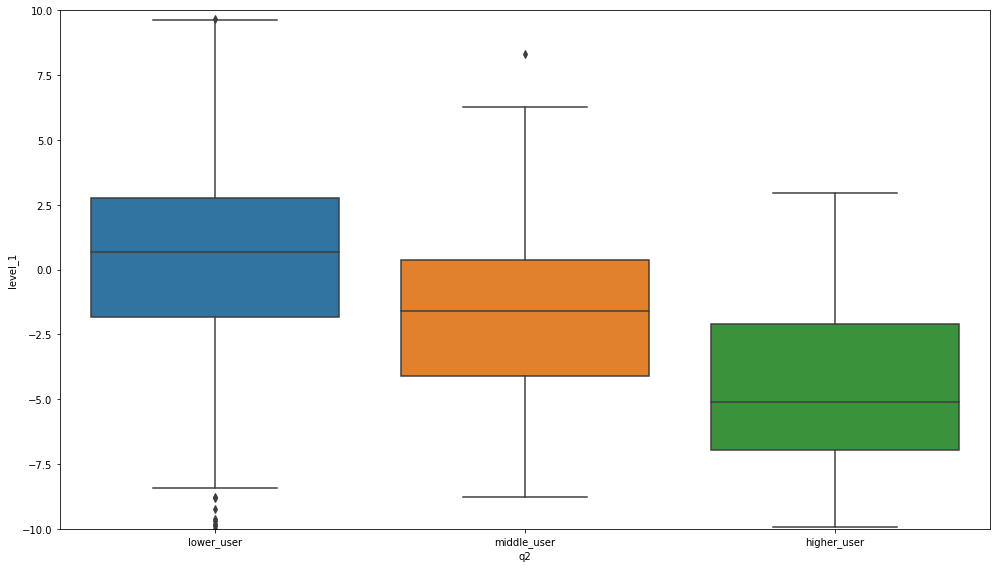

In [28]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q2',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()


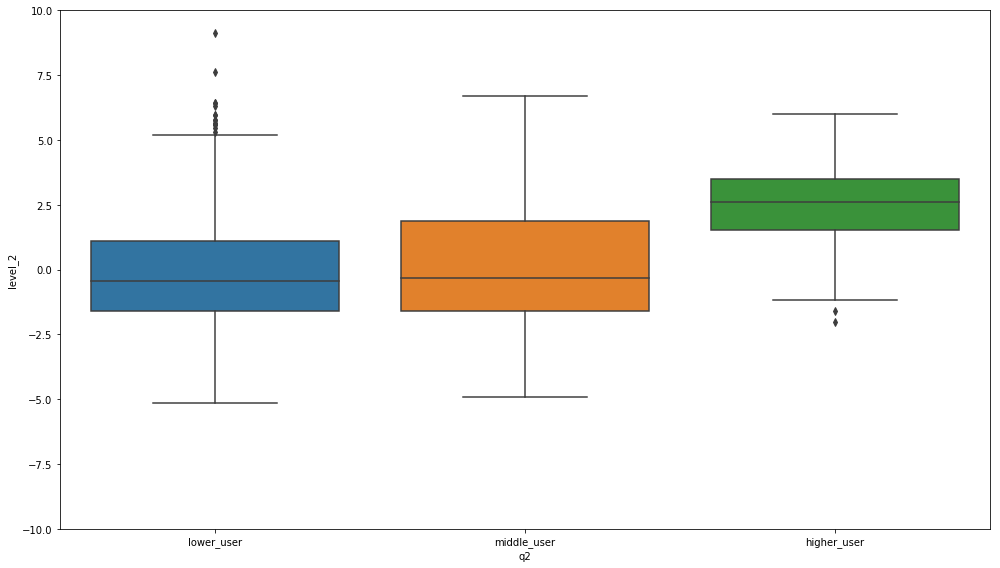

In [29]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q2',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

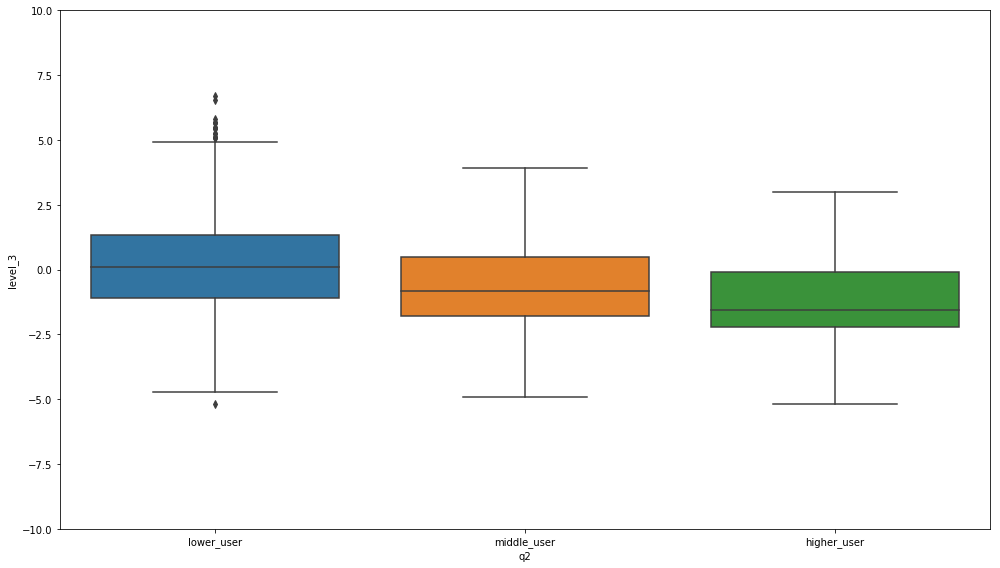

In [37]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q2',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Analyzing by q48

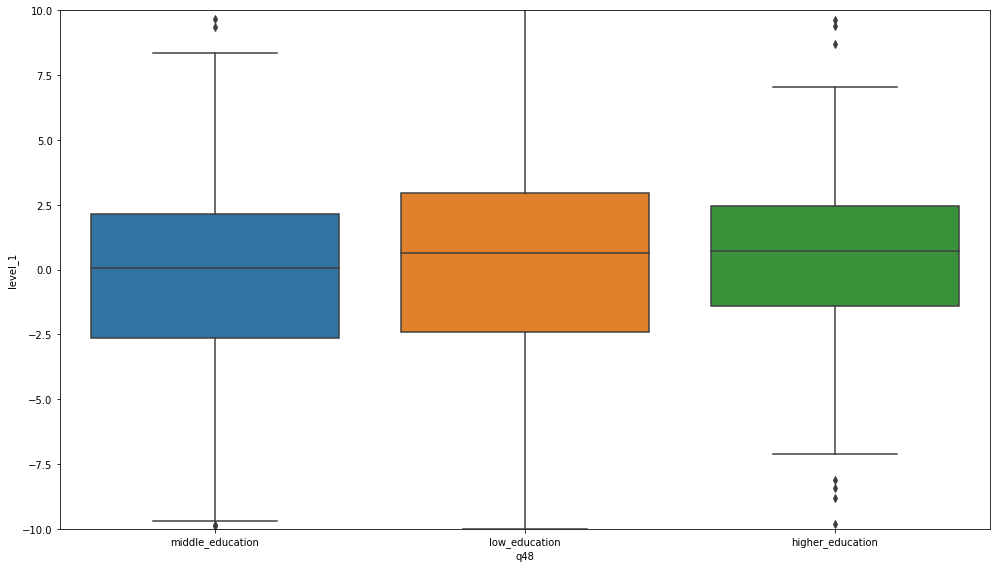

In [31]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q48',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

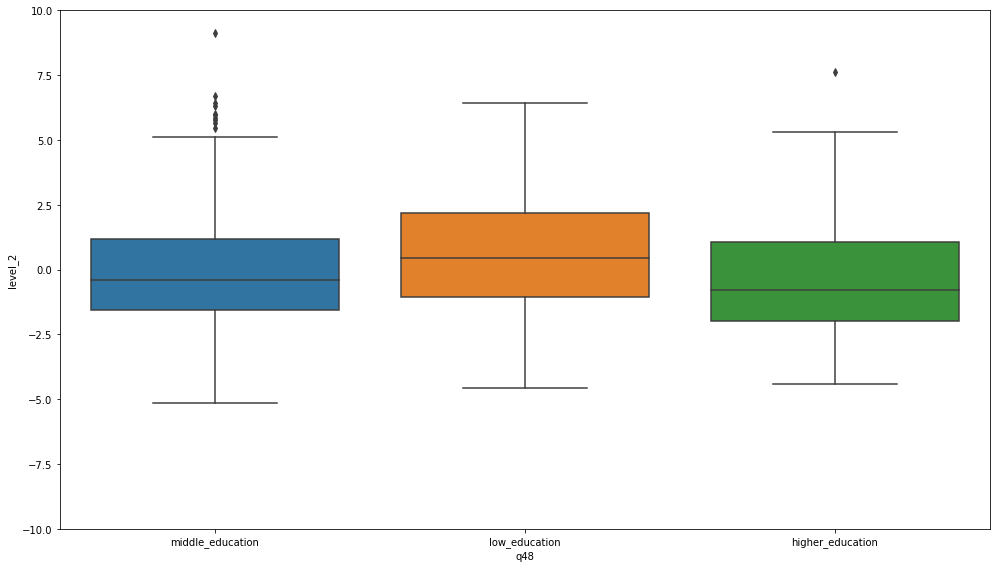

In [32]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q48',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

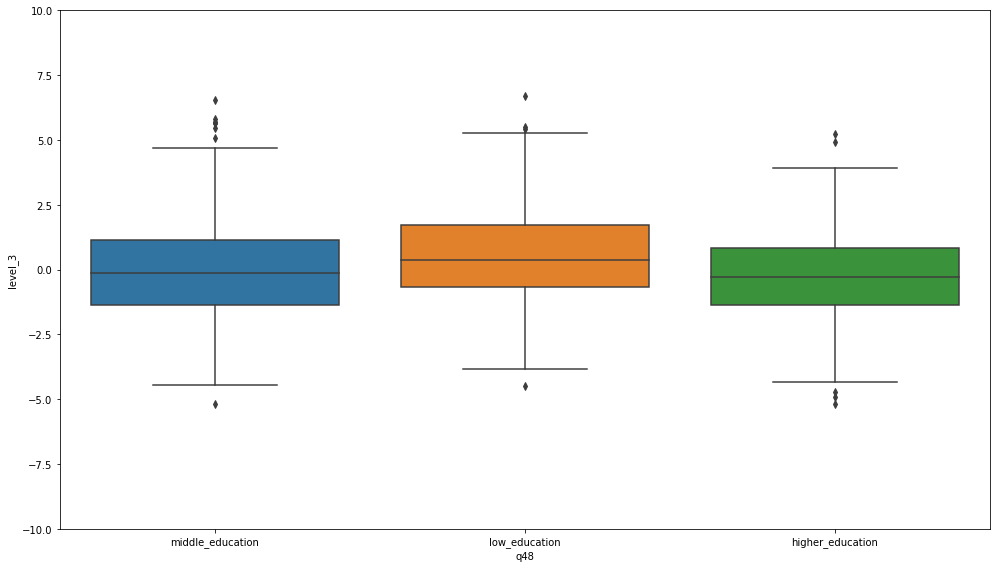

In [33]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q48',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Analyzing by q49

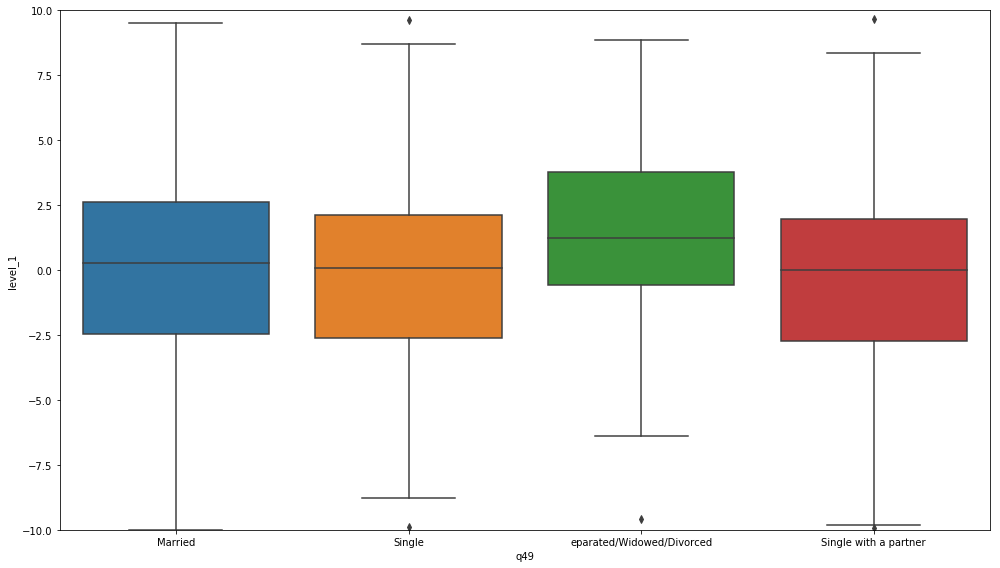

In [34]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q49',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

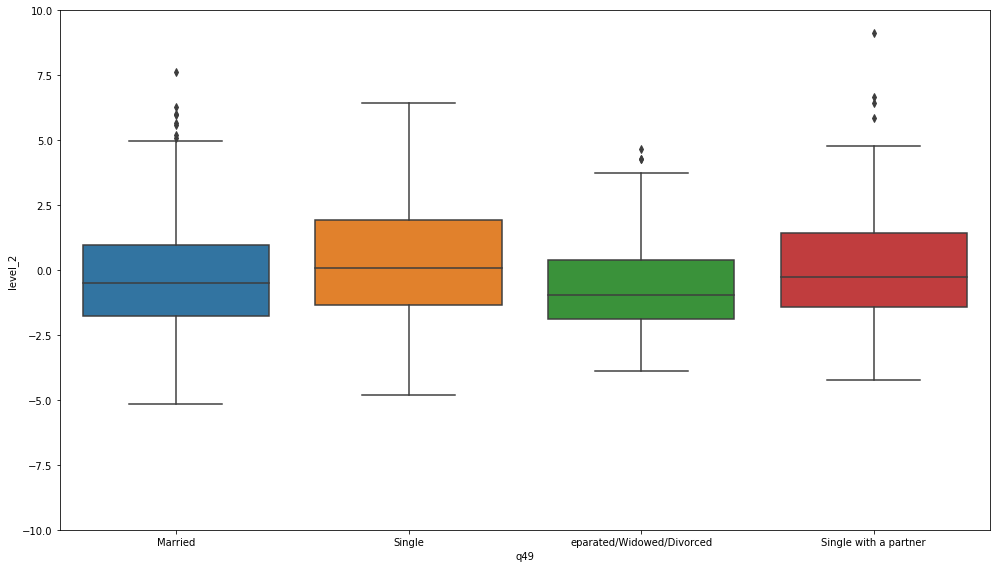

In [35]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q49',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

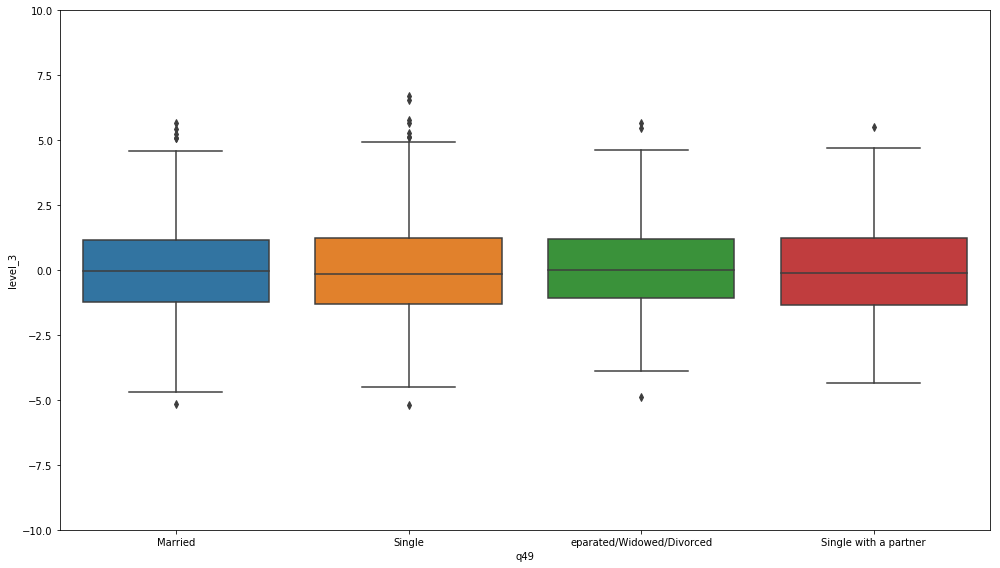

In [36]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q49',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Analyzing by q50

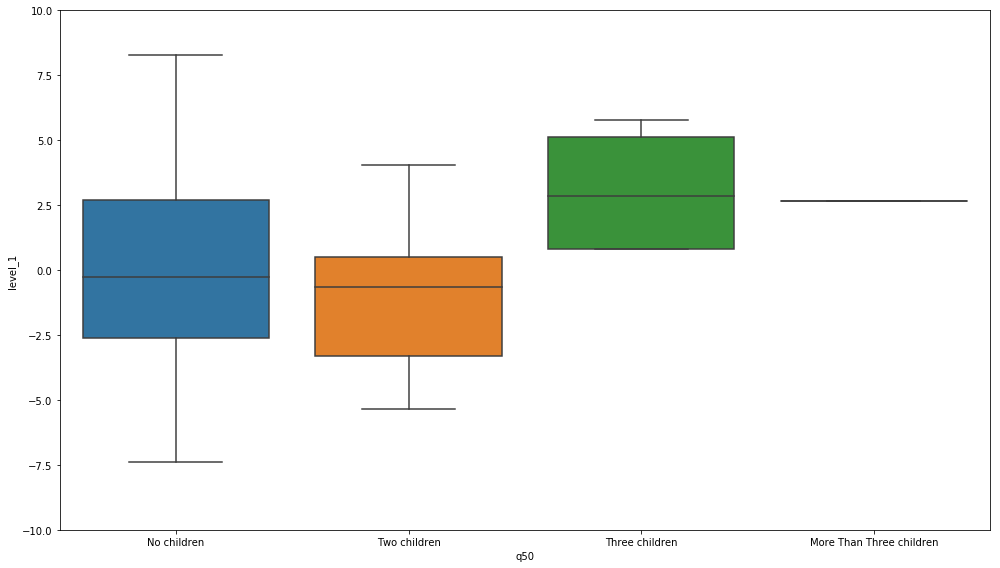

In [37]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q50',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

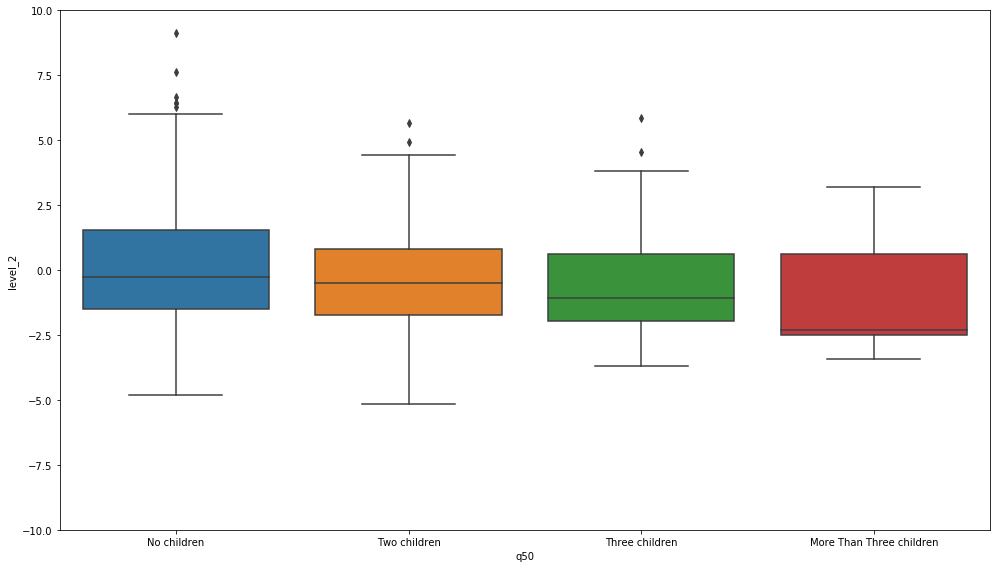

In [38]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q50',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

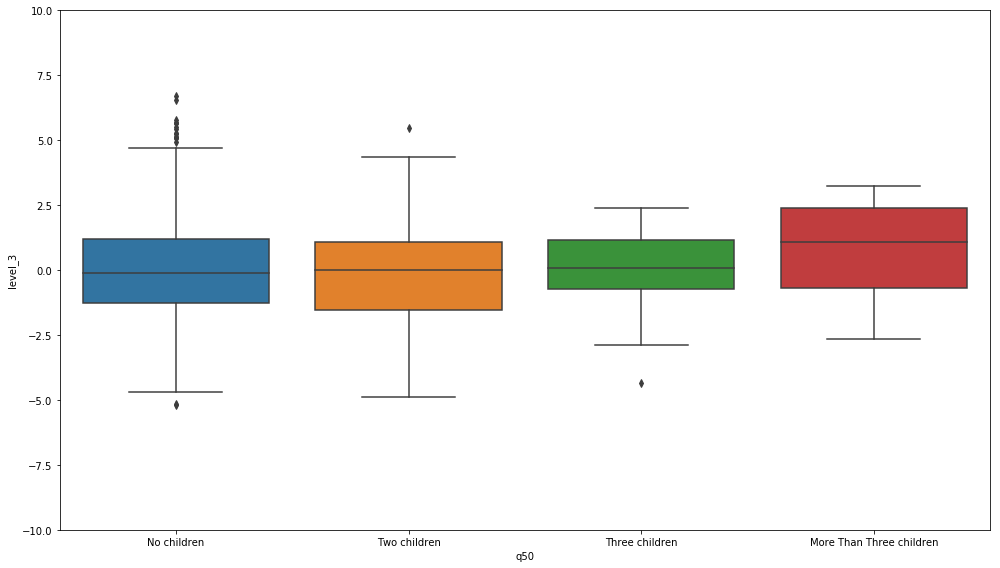

In [39]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q50',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Analyzing by q54

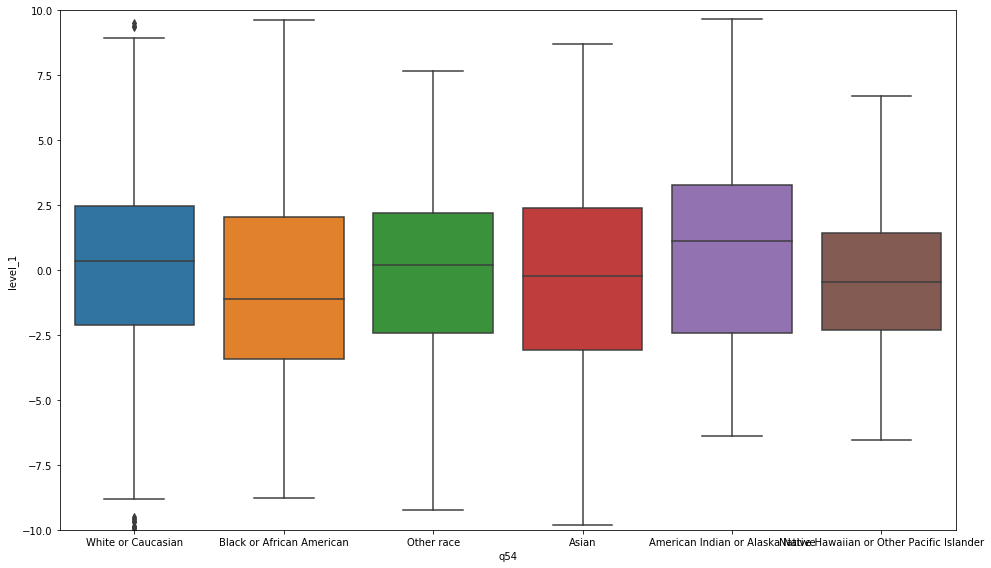

In [40]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q54',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

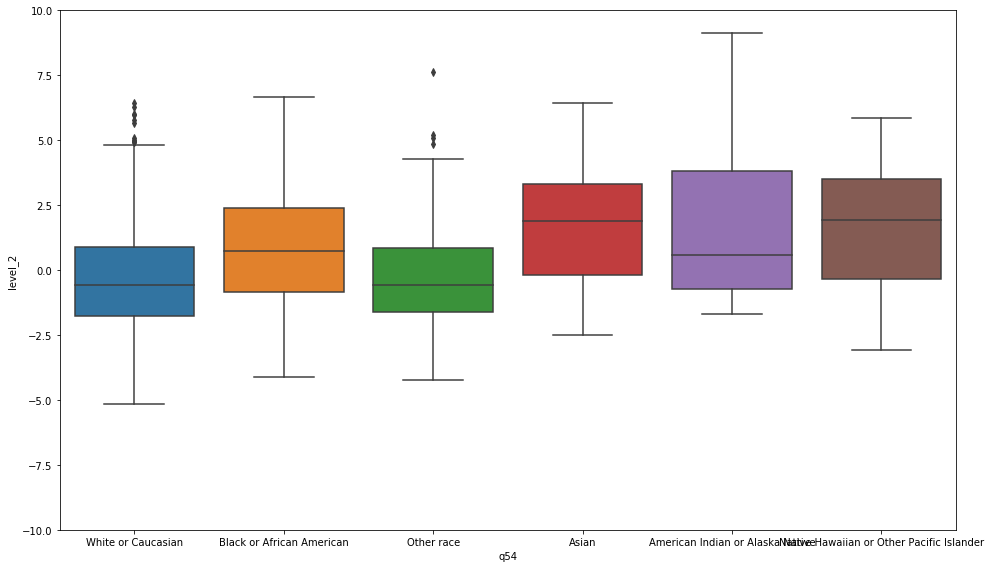

In [41]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q54',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

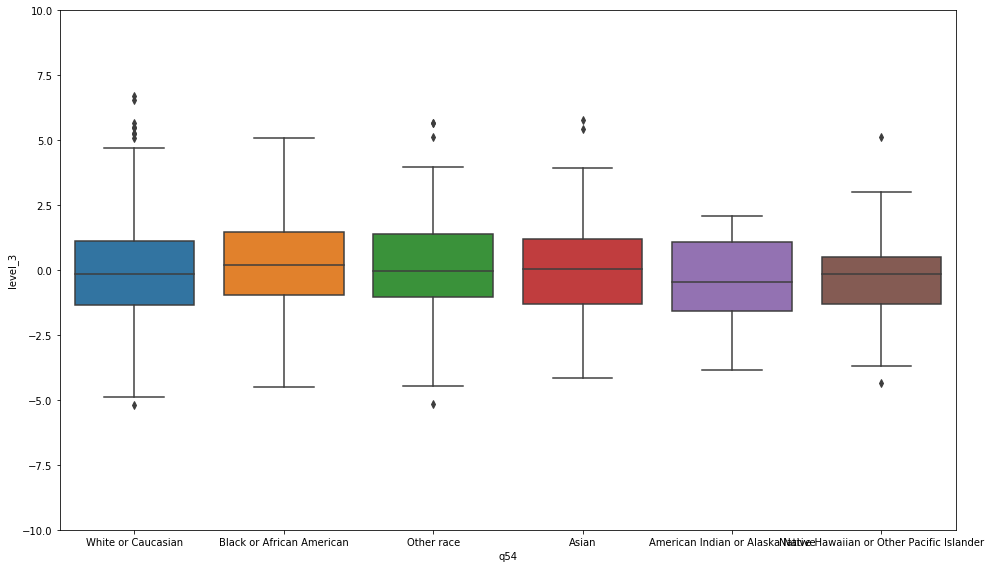

In [42]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q54',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Analyzing by q55

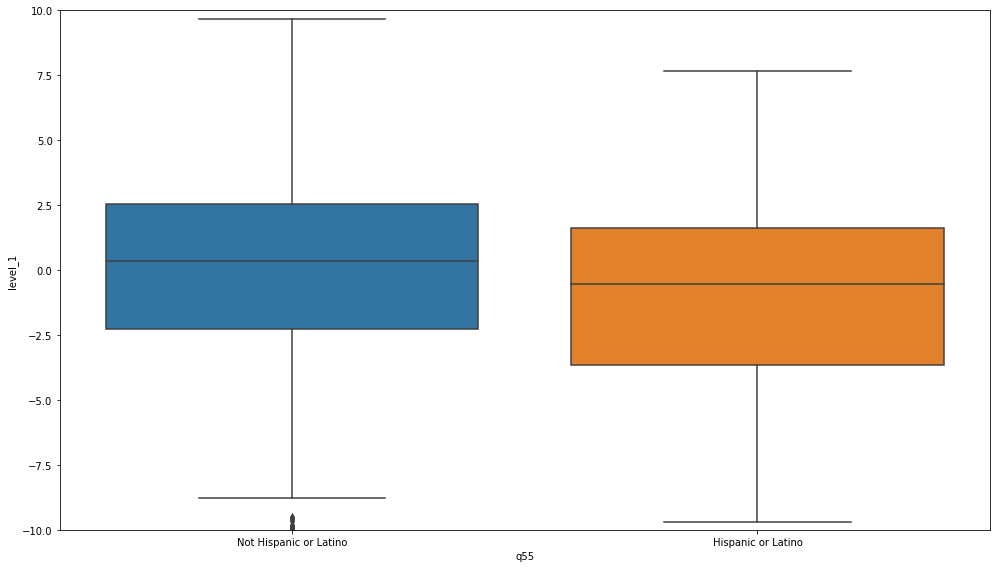

In [43]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q55',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

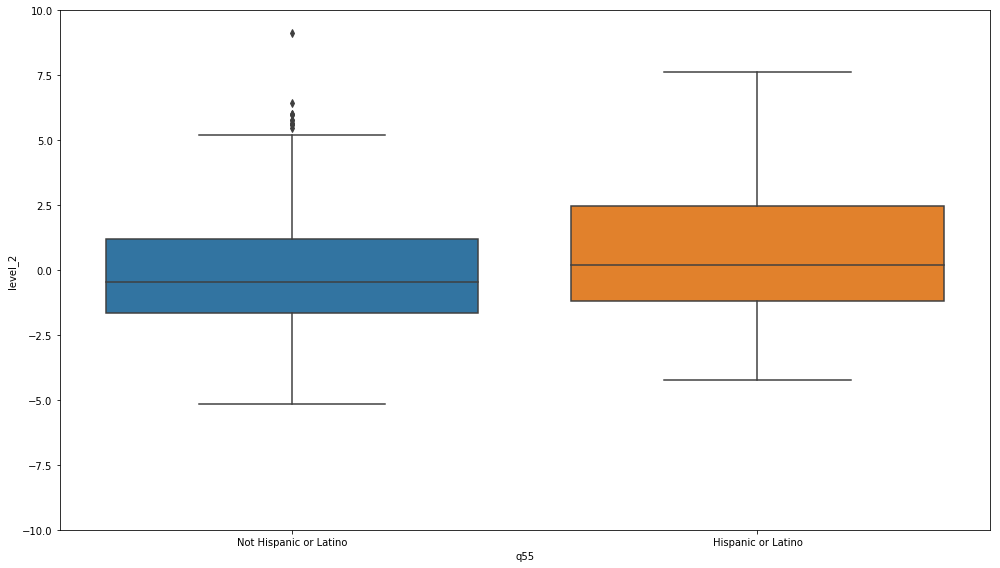

In [44]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q55',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

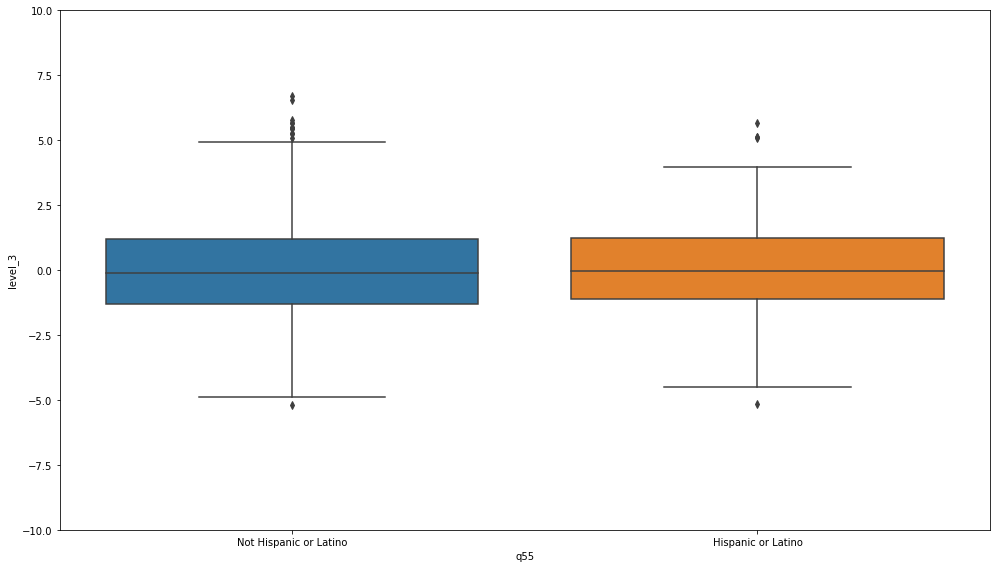

In [45]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q55',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Analyzing by q56

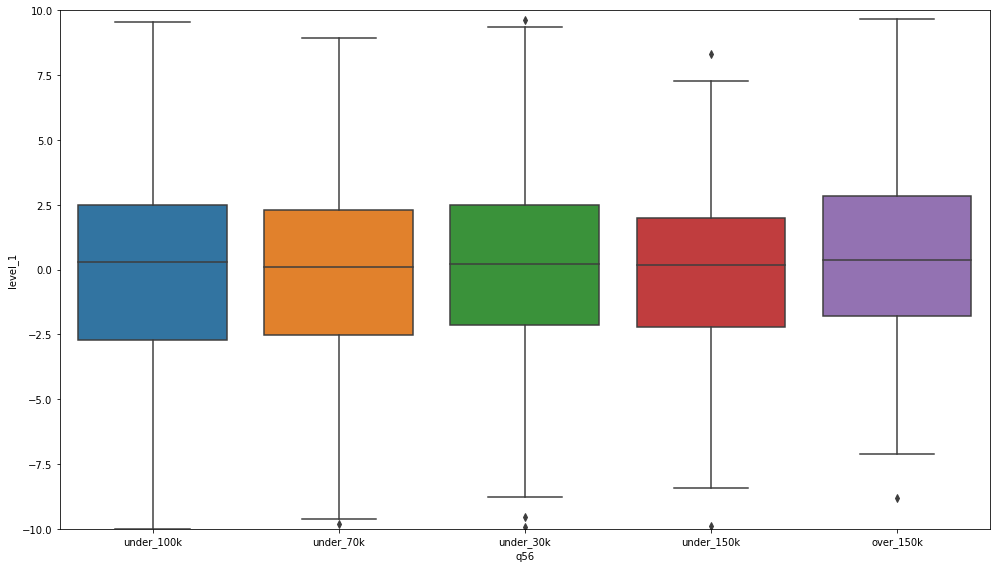

In [46]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q56',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

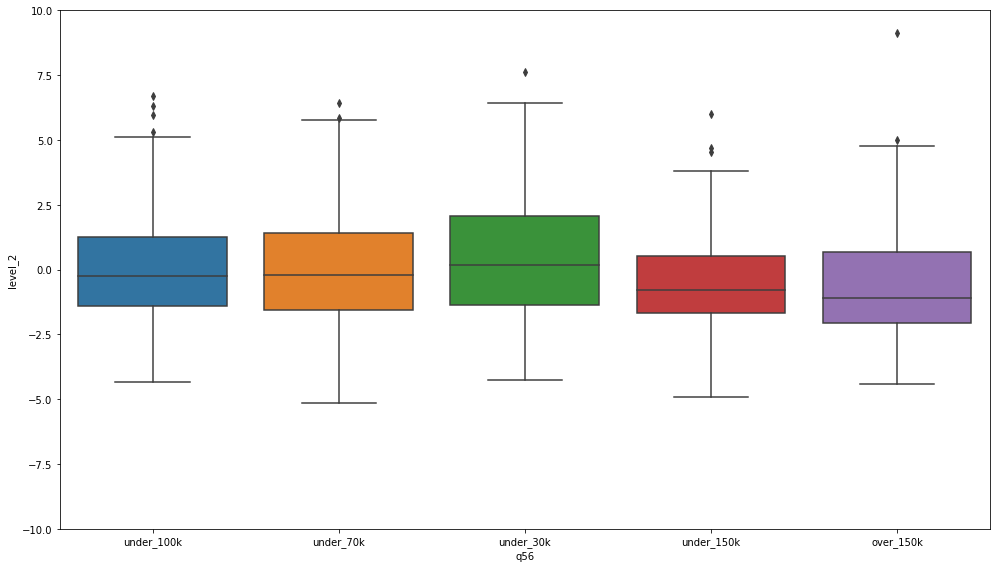

In [47]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q56',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

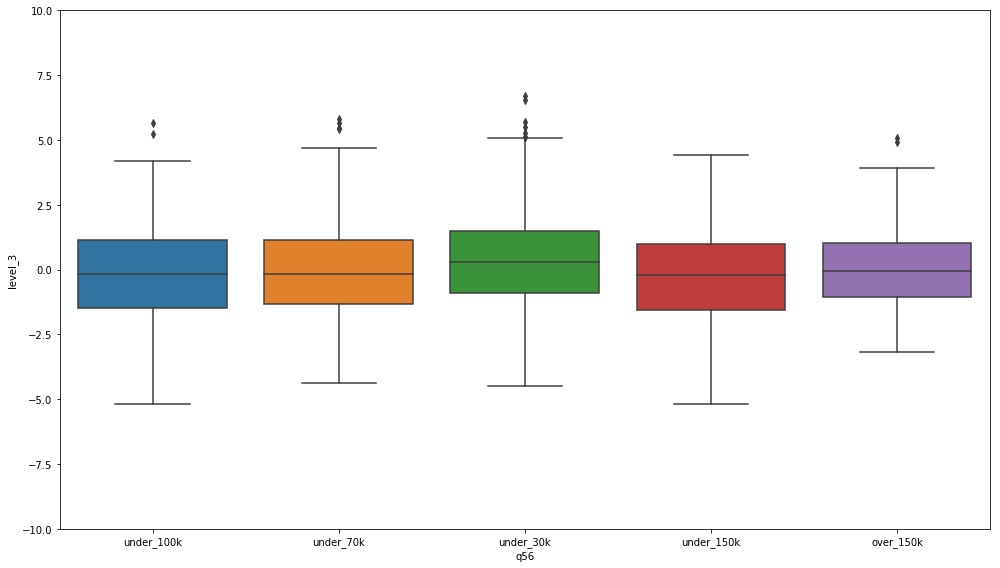

In [48]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q56',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Analyzing by q57

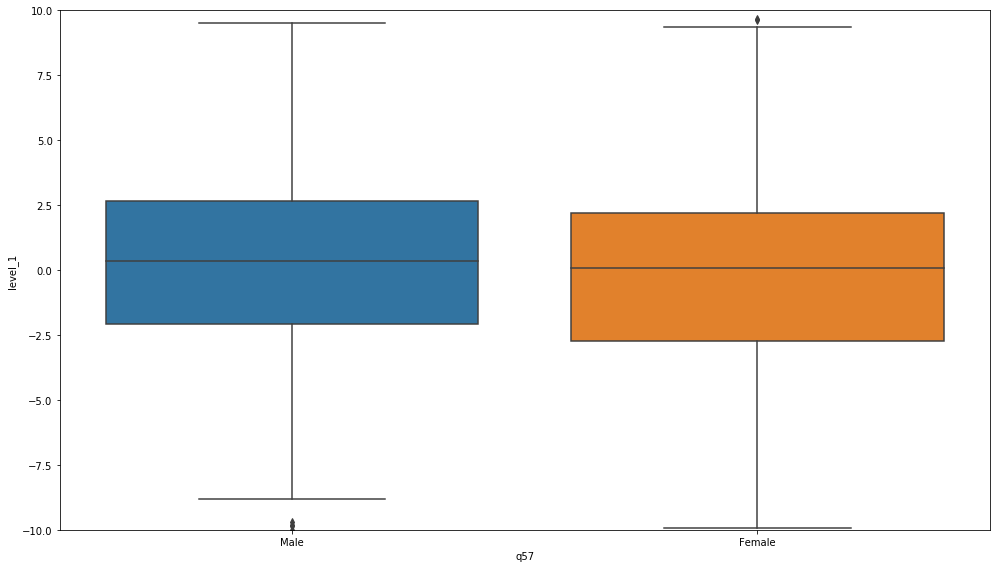

In [49]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q57',
            y =  'level_1',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

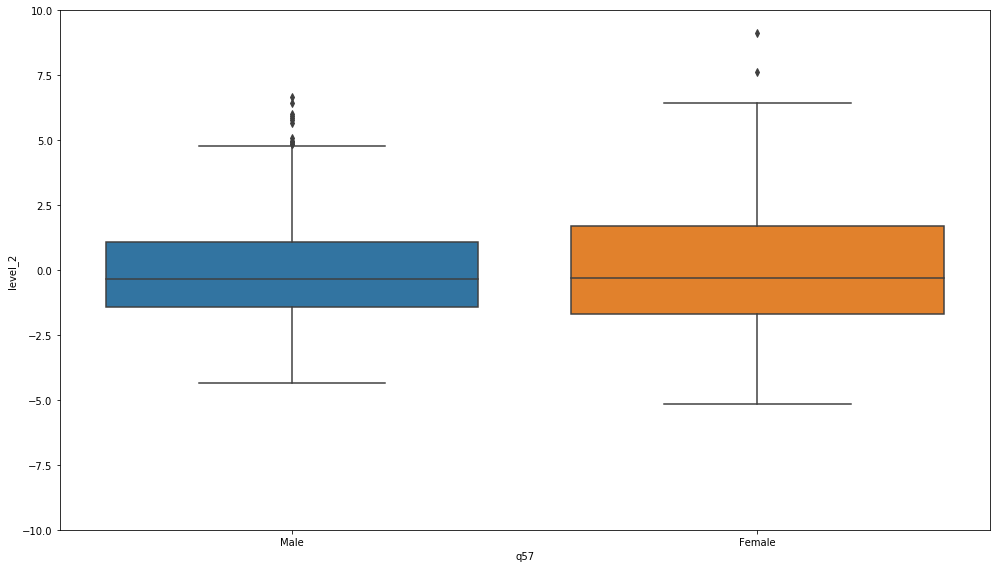

In [50]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q57',
            y =  'level_2',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

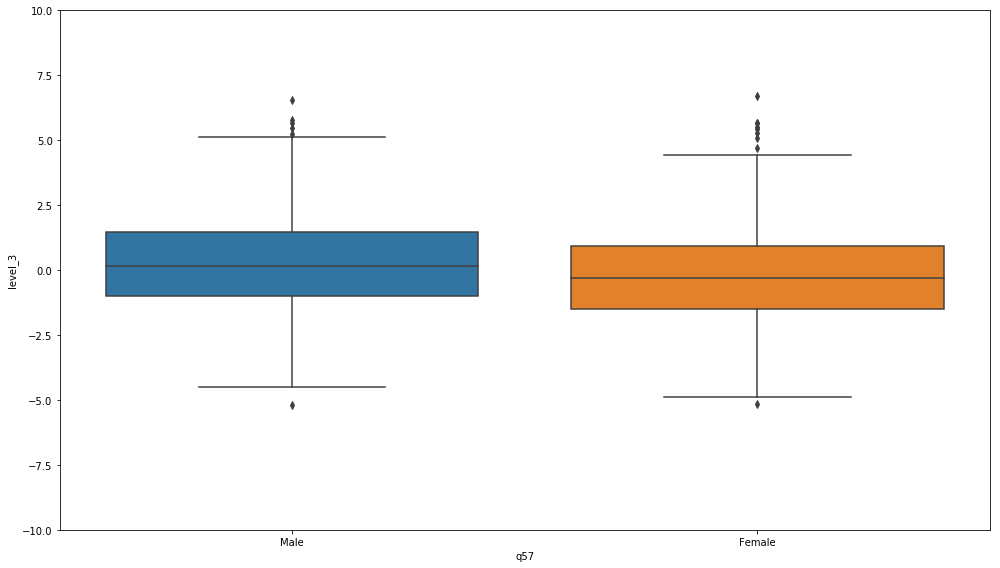

In [51]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.boxplot(x = 'q57',
            y =  'level_3',
            data = final_pca_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Cluster Analysis One More Time!!!

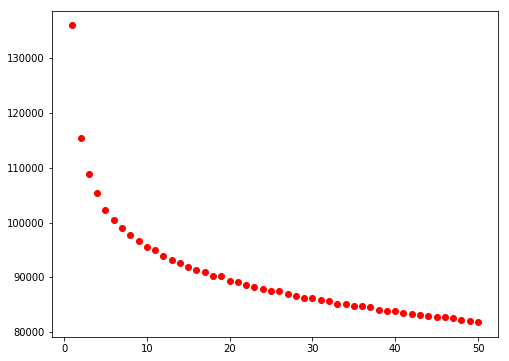

In [52]:
cl = 50
corte = 0.02

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(customer_features_reduced)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

In [53]:
K_best

5

In [54]:
customers_k5 = KMeans(n_clusters = K_best,
                      random_state = 508)



# Fit model to points (removing channel and region)
customers_k5.fit(customer_features_reduced)



# Checking to see if we got the same clusters as when using fcluster 
customers_k5_clusters = pd.DataFrame({'cluster': customers_k5.labels_})



print(customers_k5_clusters.iloc[: , 0].value_counts())



centroids_k5 = customers_k5.cluster_centers_



centroids_k5_df = pd.DataFrame(centroids_k5)



centroids_k5_df.columns = customer_features_reduced.columns
centroids_k5_df.to_excel('cutomers_k5_centriods.xlsx')


2    450
0    348
1    286
4    234
3    234
Name: cluster, dtype: int64


## Analyze cluster memberships

In [55]:

X_scaled_reduced_df = pd.DataFrame(X_scaled_reduced)


X_scaled_reduced_df.columns = customer_features_reduced.columns


clusters_df = pd.concat([customers_k5_clusters,
                         X_scaled_reduced_df],
                         axis = 1)


print(clusters_df)

      cluster      q4r1      q4r2      q4r3      q4r4      q4r5      q4r6  \
0           1 -1.508066 -0.486470  1.074968 -0.602162  0.554525 -2.086079   
1           2  0.663101 -0.486470 -0.930261 -0.602162 -1.803345  0.479368   
2           2 -1.508066 -0.486470 -0.930261 -0.602162  0.554525  0.479368   
3           3  0.663101 -0.486470 -0.930261  1.660683  0.554525  0.479368   
4           2  0.663101 -0.486470 -0.930261 -0.602162 -1.803345  0.479368   
5           4  0.663101 -0.486470 -0.930261  1.660683 -1.803345  0.479368   
6           0  0.663101 -0.486470 -0.930261 -0.602162  0.554525  0.479368   
7           0  0.663101 -0.486470 -0.930261 -0.602162  0.554525  0.479368   
8           2  0.663101  2.055624 -0.930261 -0.602162  0.554525  0.479368   
9           0 -1.508066 -0.486470  1.074968 -0.602162  0.554525  0.479368   
10          2  0.663101 -0.486470  1.074968  1.660683  0.554525  0.479368   
11          0  0.663101  2.055624  1.074968  1.660683  0.554525  0.479368   

In [56]:
final_clusters_df = pd.concat([customers_df.loc[ : , [ 'q2','q48','q49','q50','q54','q55','q56', 'q57']] , clusters_df], axis = 1)

In [58]:
def q2_level(q2):
    if (q2 <= 2 and q2 >= 0):
        return 'lower_user'
    elif (q2 > 2 and q2 < 5):
        return 'middle_user'
    elif (q2 >= 5 and q2 < 10):
        return 'higher_user'
    
final_clusters_df['q2'] = final_clusters_df['q2'].apply(q2_level).astype(str)

In [59]:
def q_level(q48):
    if (q48 <= 2 and q48 >= 0):
        return 'low_education'
    elif (q48 > 2 and q48 < 5):
        return 'middle_education'
    elif (q48 >= 5 and q48 <= 6):
        return 'higher_education'
    
final_clusters_df['q48'] = final_clusters_df['q48'].apply(q_level).astype(str)

In [60]:
def q_level(q49):
    if (q49 == 1):
        return 'Married'
    elif (q49 == 2):
        return 'Single'
    elif (q49 == 3):
        return 'Single with a partner'
    elif (q49 == 4):
        return 'eparated/Widowed/Divorced'
    
final_clusters_df['q49'] = final_clusters_df['q49'].apply(q_level).astype(str)

In [61]:
def q_level(q50):
    if (q50 == 1):
        return 'No children'
    elif (q50 == 2):
        return 'Two children'
    elif (q50 == 3):
        return 'Three children'
    elif (q50 == 4):
        return 'More Than Three children'
    
final_clusters_df['q50'] = final_clusters_df['q50'].apply(q_level).astype(str)

In [62]:
def q_level(q54):
    if (q54 == 1):
        return 'White or Caucasian'
    elif (q54 == 2):
        return 'Black or African American'
    elif (q54 == 3):
        return 'Asian'
    elif (q54 == 4):
        return 'Native Hawaiian or Other Pacific Islander'
    elif (q54 == 5):
        return 'American Indian or Alaska Native'
    elif (q54 == 6):
        return 'Other race'    

final_clusters_df['q54'] = final_clusters_df['q54'].apply(q_level).astype(str)

In [63]:
def q_level(q55):
    if (q55 == 1):
        return 'Hispanic or Latino'
    elif (q55 == 2):
        return 'Not Hispanic or Latino'

final_clusters_df['q55'] = final_clusters_df['q55'].apply(q_level).astype(str)

In [64]:
def q_level(q56):
    if (q56 >= 0 and q56 <= 4):
        return 'under_30k'
    elif (q56 > 4 and q56 <= 8):
        return 'under_70k'
    elif (q56 > 8 and q56 <= 11):
        return 'under_100k'
    elif (q56 > 11 and q56 <= 13):
        return 'under_150k'
    elif (q56 >= 14):
        return 'over_150k'

final_clusters_df['q56'] = final_clusters_df['q56'].apply(q_level).astype(str)

In [65]:
def q_level(q57):
    if (q57 == 1):
        return 'Male'
    elif (q57 == 2):
        return 'Female'

final_clusters_df['q57'] = final_clusters_df['q57'].apply(q_level).astype(str)  

In [67]:
final_clusters_df

q2               q48                        q49  \
0      lower_user  middle_education                    Married   
1      lower_user  middle_education                     Single   
2      lower_user     low_education                     Single   
3      lower_user  middle_education                     Single   
4      lower_user  middle_education                    Married   
5      lower_user  middle_education  eparated/Widowed/Divorced   
6      lower_user  middle_education                     Single   
7      lower_user  middle_education                    Married   
8      lower_user  middle_education                     Single   
9      lower_user     low_education                     Single   
10     lower_user  middle_education                     Single   
11     lower_user  higher_education                    Married   
12     lower_user  middle_education                     Single   
13     lower_user  middle_education                     Single   
14     lower_user  middle_education      Single with a partner   
15     lower_user     low_education      Single with a partner   
16     lower_user  middle_education                     Single   
17     lower_user  middle_education                    Married   
18     lower_user  middle_education                     Single   
19     lower_user     low_education                     Single   
20     lower_user  middle_education                    Married   
21    middle_user  higher_education                    Married   
22     lower_user  middle_education                     Single   
23     lower_user  middle_education  eparated/Widowed/Divorced   
24     lower_user     low_education                    Married   
25    middle_user  higher_education                    Married   
26     lower_user     low_education                     Single   
27    middle_user  middle_education                    Married   
28     lower_user  higher_education                    Married   
29     lower_user  higher_education  eparated/Widowed/Divorced   
30     lower_user     low_education                    Married   
31     lower_user  middle_education                     Single   
32     lower_user  middle_education                    Married   
33     lower_user  higher_education                    Married   
34     lower_user     low_education      Single with a partner   
35     lower_user  middle_education                     Single   
36     lower_user  middle_education                     Single   
37     lower_user  middle_education  eparated/Widowed/Divorced   
38     lower_user  middle_education                    Married   
39     lower_user  middle_education                     Single   
40     lower_user  middle_education                    Married   
41     lower_user     low_education                    Married   
42    higher_user  higher_education                     Single   
43     lower_user  middle_education                    Married   
44     lower_user  higher_education  eparated/Widowed/Divorced   
45     lower_user  middle_education                     Single   
46     lower_user     low_education      Single with a partner   
47     lower_user  middle_education                    Married   
48     lower_user  middle_education                    Married   
49     lower_user  middle_education                     Single   
50     lower_user  higher_education                    Married   
51     lower_user  middle_education      Single with a partner   
52     lower_user  middle_education                     Single   
53     lower_user  middle_education                    Married   
54     lower_user  middle_education                     Single   
55    middle_user  middle_education  eparated/Widowed/Divorced   
56     lower_user     low_education                     Single   
57     lower_user     low_education                     Single   
58     lower_user  middle_education                     Single   
59    middle_user  middle_education                    

## Analyzing by q2

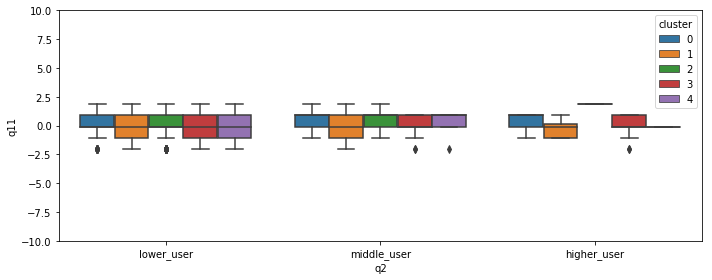

In [68]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(x = 'q2',
            y = 'q11',
            hue = 'cluster',
            data = final_clusters_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()


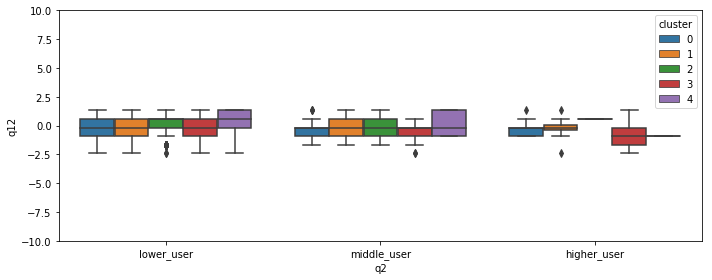

In [69]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(x = 'q2',
            y = 'q12',
            hue = 'cluster',
            data = final_clusters_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

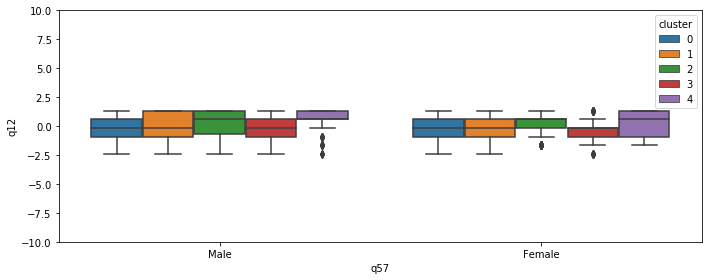

In [70]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(x = 'q57',
            y = 'q12',
            hue = 'cluster',
            data = final_clusters_df)

plt.ylim(-10, 10)
plt.tight_layout()
plt.show()

## Combining PCA and Clustering!!!

In [71]:
print(X_pca_df.head(n = 5))

    level_1   level_2   level_3
0  2.654888  1.056920  2.326278
1  2.013737 -1.181366  2.094691
2  1.709612 -2.292910  0.342019
3 -4.783793  1.694218  1.225203
4  1.321821  0.603216 -0.399473


In [72]:
print(pd.np.var(X_pca_df))

level_1    13.069226
level_2     4.687065
level_3     3.279449
dtype: float64


In [73]:
scaler = StandardScaler()


scaler.fit(X_pca_df)


X_pca_clust = scaler.transform(X_pca_df)


X_pca_clust_df = pd.DataFrame(X_pca_clust)


print(pd.np.var(X_pca_clust_df))


X_pca_clust_df.columns = X_pca_df.columns


0    1.0
1    1.0
2    1.0
dtype: float64


In [74]:
customers_k_pca = KMeans(n_clusters = 5,
                         random_state = 508)


customers_k_pca.fit(X_pca_clust_df)


customers_kmeans_pca = pd.DataFrame({'cluster': customers_k_pca.labels_})


print(customers_kmeans_pca.iloc[: , 0].value_counts())

3    493
4    352
0    335
2    230
1    142
Name: cluster, dtype: int64


In [75]:
centroids_pca = customers_k_pca.cluster_centers_


centroids_pca_df = pd.DataFrame(centroids_pca)
centroids_pca_df.columns = ['level_1', 'level_2', 'level_3']

In [76]:
centroids_pca_df.to_excel('customers_pca_centriods.xlsx')

In [77]:
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_clust_df],
                         axis = 1)


print(clst_pca_df)


      cluster   level_1   level_2   level_3
0           4  0.734381  0.488193  1.284580
1           4  0.557029 -0.545675  1.156697
2           3  0.472904 -1.059099  0.188864
3           2 -1.323267  0.782562  0.676562
4           4  0.365635  0.278627 -0.220591
5           4  1.626533  0.860359 -0.098789
6           0 -0.595204 -1.294223  0.156896
7           0  0.027571 -0.652056  1.060625
8           3  0.952805 -0.149110 -1.758670
9           2 -1.510604 -0.521823 -0.277948
10          0 -0.001413 -0.516430  0.191354
11          3 -0.255126 -0.034099 -1.020804
12          0 -1.002338 -0.559761  0.843043
13          0 -0.140844 -0.495936  1.979679
14          4  1.460600  1.611621  1.133254
15          4  0.301419  0.466000  1.992600
16          0  0.076996 -0.350553  1.089495
17          3  1.199853 -0.408394 -0.463346
18          1  0.733302  0.511883 -0.543069
19          3  0.584329 -0.120182 -1.677807
20          4  1.042052  0.531133  0.366723
21          2 -1.288914  0.81225

In [119]:
final_pca_clust_df = pd.concat([customers_df.loc[ : , [ 'q2','q48','q49','q50','q54','q55','q56', 'q57','q12']] , clst_pca_df], axis = 1)

In [80]:
print(final_pca_clust_df.head(n = 5))

   q2  q48  q49  q50  q54  q55  q56  q57  cluster   level_1   level_2  \
0   2    3    1    1    1    2   11    1        4  0.734381  0.488193   
1   1    3    2    1    2    2    9    2        4  0.557029 -0.545675   
2   2    1    2    1    1    2    8    2        3  0.472904 -1.059099   
3   1    4    2    1    2    2    1    1        2 -1.323267  0.782562   
4   1    3    1    1    1    2   11    2        4  0.365635  0.278627   

    level_3  
0  1.284580  
1  1.156697  
2  0.188864  
3  0.676562  
4 -0.220591  


In [121]:
def q2_level(q2):
    if (q2 <= 2 and q2 >= 0):
        return 'lower_user'
    elif (q2 > 2 and q2 < 5):
        return 'middle_user'
    elif (q2 >= 5 and q2 < 10):
        return 'higher_user'
    
final_pca_clust_df['q2'] = final_pca_clust_df['q2'].apply(q2_level).astype(str)

In [122]:
def q_level(q48):
    if (q48 <= 2 and q48 >= 0):
        return 'low_education'
    elif (q48 > 2 and q48 < 5):
        return 'middle_education'
    elif (q48 >= 5 and q48 <= 6):
        return 'higher_education'
    
final_pca_clust_df['q48'] = final_pca_clust_df['q48'].apply(q_level).astype(str)

In [123]:
def q_level(q49):
    if (q49 == 1):
        return 'Married'
    elif (q49 == 2):
        return 'Single'
    elif (q49 == 3):
        return 'Single with a partner'
    elif (q49 == 4):
        return 'eparated/Widowed/Divorced'
    
final_pca_clust_df['q49'] = final_pca_clust_df['q49'].apply(q_level).astype(str)

In [124]:
def q_level(q50):
    if (q50 == 1):
        return 'No children'
    elif (q50 == 2):
        return 'Two children'
    elif (q50 == 3):
        return 'Three children'
    elif (q50 == 4):
        return 'More Than Three children'
    
final_pca_clust_df['q50'] = final_pca_clust_df['q50'].apply(q_level).astype(str)

In [125]:
def q_level(q54):
    if (q54 == 1):
        return 'White or Caucasian'
    elif (q54 == 2):
        return 'Black or African American'
    elif (q54 == 3):
        return 'Asian'
    elif (q54 == 4):
        return 'Native Hawaiian or Other Pacific Islander'
    elif (q54 == 5):
        return 'American Indian or Alaska Native'
    elif (q54 == 6):
        return 'Other race'    

final_pca_clust_df['q54'] = final_pca_clust_df['q54'].apply(q_level).astype(str)

In [126]:
def q_level(q55):
    if (q55 == 1):
        return 'Hispanic or Latino'
    elif (q55 == 2):
        return 'Not Hispanic or Latino'

final_pca_clust_df['q55'] = final_pca_clust_df['q55'].apply(q_level).astype(str)

In [127]:
def q_level(q56):
    if (q56 >= 0 and q56 <= 4):
        return 'under_30k'
    elif (q56 > 4 and q56 <= 8):
        return 'under_70k'
    elif (q56 > 8 and q56 <= 11):
        return 'under_100k'
    elif (q56 > 11 and q56 <= 13):
        return 'under_150k'
    elif (q56 >= 14):
        return 'over_150k'

final_pca_clust_df['q56'] = final_pca_clust_df['q56'].apply(q_level).astype(str)

In [128]:
def q_level(q57):
    if (q57 == 1):
        return 'Male'
    elif (q57 == 2):
        return 'Female'

final_pca_clust_df['q57'] = final_pca_clust_df['q57'].apply(q_level).astype(str)  

In [129]:
def q_level(q12):
    if (q12 == 1):
        return 'None of my Apps were free'
    elif (q12 == 2):
        return '1% - 25%'
    elif (q12 == 3):
        return '26% - 50%'
    elif (q12 == 4):
        return '51% - 75%'
    elif (q12 == 5):
        return '76% - 99%'
    elif (q12 == 6):
        return 'All of my Apps were free'

final_pca_clust_df['q12'] = final_pca_clust_df['q12'].apply(q_level).astype(str) 

In [130]:
final_pca_clust_df

q2               q48                        q49  \
0      lower_user  middle_education                    Married   
1      lower_user  middle_education                     Single   
2      lower_user     low_education                     Single   
3      lower_user  middle_education                     Single   
4      lower_user  middle_education                    Married   
5      lower_user  middle_education  eparated/Widowed/Divorced   
6      lower_user  middle_education                     Single   
7      lower_user  middle_education                    Married   
8      lower_user  middle_education                     Single   
9      lower_user     low_education                     Single   
10     lower_user  middle_education                     Single   
11     lower_user  higher_education                    Married   
12     lower_user  middle_education                     Single   
13     lower_user  middle_education                     Single   
14     lower_user  middle_education      Single with a partner   
15     lower_user     low_education      Single with a partner   
16     lower_user  middle_education                     Single   
17     lower_user  middle_education                    Married   
18     lower_user  middle_education                     Single   
19     lower_user     low_education                     Single   
20     lower_user  middle_education                    Married   
21    middle_user  higher_education                    Married   
22     lower_user  middle_education                     Single   
23     lower_user  middle_education  eparated/Widowed/Divorced   
24     lower_user     low_education                    Married   
25    middle_user  higher_education                    Married   
26     lower_user     low_education                     Single   
27    middle_user  middle_education                    Married   
28     lower_user  higher_education                    Married   
29     lower_user  higher_education  eparated/Widowed/Divorced   
30     lower_user     low_education                    Married   
31     lower_user  middle_education                     Single   
32     lower_user  middle_education                    Married   
33     lower_user  higher_education                    Married   
34     lower_user     low_education      Single with a partner   
35     lower_user  middle_education                     Single   
36     lower_user  middle_education                     Single   
37     lower_user  middle_education  eparated/Widowed/Divorced   
38     lower_user  middle_education                    Married   
39     lower_user  middle_education                     Single   
40     lower_user  middle_education                    Married   
41     lower_user     low_education                    Married   
42    higher_user  higher_education                     Single   
43     lower_user  middle_education                    Married   
44     lower_user  higher_education  eparated/Widowed/Divorced   
45     lower_user  middle_education                     Single   
46     lower_user     low_education      Single with a partner   
47     lower_user  middle_education                    Married   
48     lower_user  middle_education                    Married   
49     lower_user  middle_education                     Single   
50     lower_user  higher_education                    Married   
51     lower_user  middle_education      Single with a partner   
52     lower_user  middle_education                     Single   
53     lower_user  middle_education                    Married   
54     lower_user  middle_education                     Single   
55    middle_user  middle_education  eparated/Widowed/Divorced   
56     lower_user     low_education                     Single   
57     lower_user     low_education                     Single   
58     lower_user  middle_education                     Single   
59    middle_user  middle_education                    

In [132]:
data_df = final_pca_clust_df

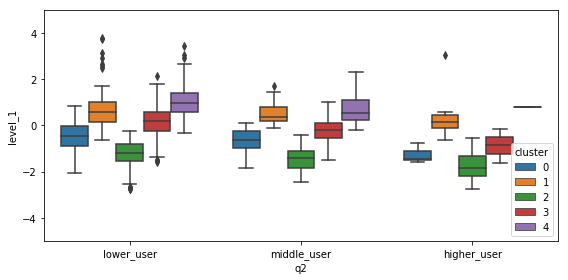

In [91]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = 'q2',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

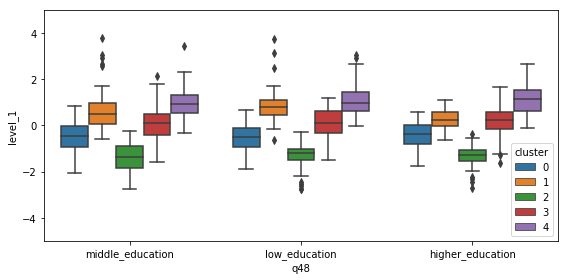

In [94]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = 'q48',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

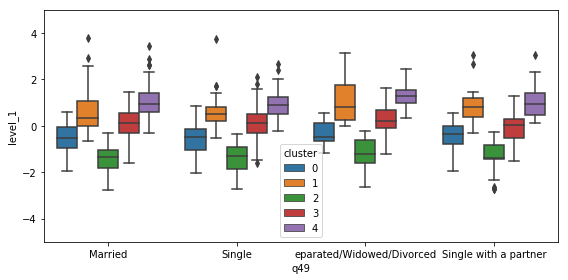

In [97]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = 'q49',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

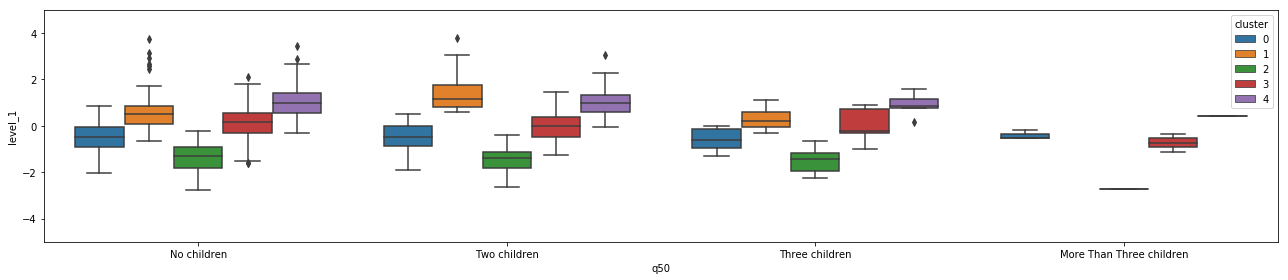

In [118]:
fig, ax = plt.subplots(figsize = (18, 4))
sns.boxplot(x = 'q50',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

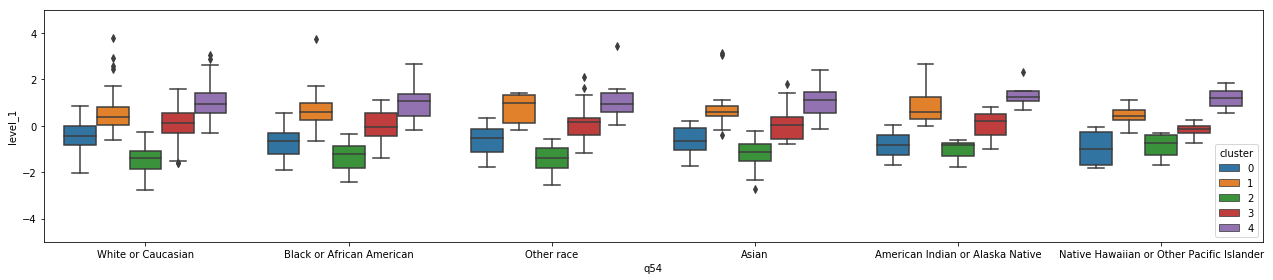

In [117]:
fig, ax = plt.subplots(figsize = (18, 4))
sns.boxplot(x = 'q54',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

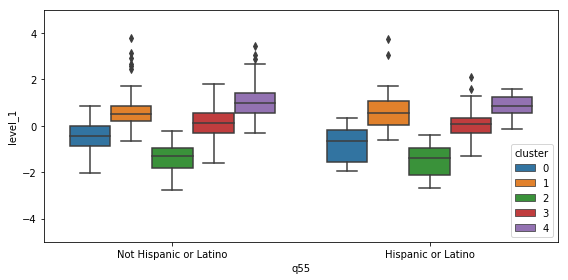

In [103]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = 'q55',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

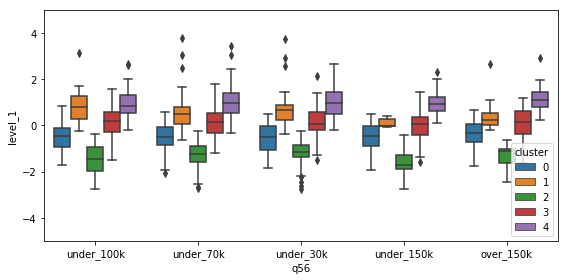

In [106]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = 'q56',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

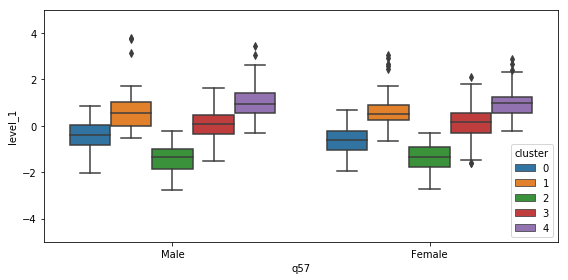

In [109]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = 'q57',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

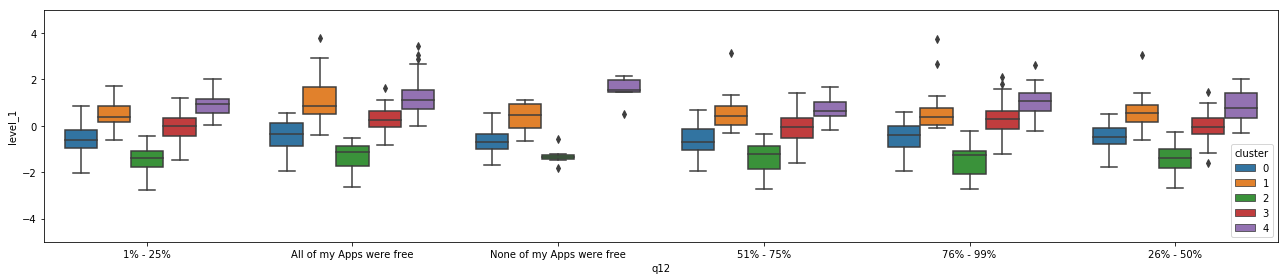

In [134]:
fig, ax = plt.subplots(figsize = (18, 4))
sns.boxplot(x = 'q12',
            y = 'level_1',
            hue = 'cluster',
            data = data_df)

plt.ylim(-5, 5)
plt.tight_layout()
plt.show()